In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [2]:
sophiaorg = pd.read_excel('/Users/georgesba/Desktop/data/sophia.xlsx')
sophia2 = sophiaorg.drop(np.r_[24950:24970, 25477:25489]) #omit male-only data
sophia1 = sophia2.dropna(subset=['ICV'])

In [3]:
sophia = sophia1.sort_values(by='age')
imagen = sophia1.iloc[0:1840].sort_values(by='age')
hcp_aging = sophia1.iloc[1840:3678].sort_values(by='age')
hcp_dev = sophia1.iloc[3678:4330].sort_values(by='age')
cmi = sophia1.iloc[4330:4544].sort_values(by='age')
can = sophia1.iloc[4544:5187].sort_values(by='age')
abide = sophia1.iloc[5187:5628].sort_values(by='age')
abide2 = sophia1.iloc[5625:6058].sort_values(by='age')
adhd200 = sophia1.iloc[6058:6447].sort_values(by='age')
abcd = sophia1.iloc[6447:10206].sort_values(by='age')
rockland = sophia1.iloc[10206:10346].sort_values(by='age')
uk_bio = sophia1.iloc[10346:24842].sort_values(by='age')
ann_arb_a = sophia1.iloc[24842:24866].sort_values(by='age')
ann_arb_b = sophia1.iloc[24866:24899].sort_values(by='age')
atl = sophia1.iloc[24899:24927].sort_values(by='age')
bal = sophia1.iloc[24927:24950].sort_values(by='age')
beijing = sophia1.iloc[24950:25148].sort_values(by='age')
berlin = sophia1.iloc[25148:25174].sort_values(by='age')
cambridge = sophia1.iloc[25174:25372].sort_values(by='age')
icbm = sophia1.iloc[25372:25457].sort_values(by='age')
leiden2200 = sophia1.iloc[25457:25476].sort_values(by='age')
mil = sophia1.iloc[25476:25522].sort_values(by='age')
mun = sophia1.iloc[25522:25538].sort_values(by='age')
newa = sophia1.iloc[25538:25557].sort_values(by='age')
newy = sophia1.iloc[25557:25577].sort_values(by='age')
nyu = sophia1.iloc[25577:25602].sort_values(by='age')
orng = sophia1.iloc[25602:25622].sort_values(by='age')
oulu = sophia1.iloc[25622:25725].sort_values(by='age')
oxford = sophia1.iloc[25725:25747].sort_values(by='age')
palo = sophia1.iloc[25747:25764].sort_values(by='age')
queen = sophia1.iloc[25764:25783].sort_values(by='age')
sl = sophia1.iloc[25783:25846].sort_values(by='age')

In [11]:
window_step_sizes = {
    'sophia': (5, 1),
    'imagen': (2, 1),
    'hcp_aging': (2, 1),
    'hcp_dev': (2, 1),
    'cmi': (2, 1),
    'can': (2, 1),
    'abide': (2, 1),
    'abide2': (2, 1),
    'adhd200': (2, 1),
    'abcd': (2, 1),
    'rockland': (2, 1),
    'uk_bio': (2, 1),
    'ann_arb_a': (2, 1), 
    'ann_arb_b': (2, 1),
    'atl': (2, 1),
    'bal': (2, 1),
    'beijing': (2, 1),
    'berlin': (2, 1),
    'cambridge': (2, 1),
    'icbm': (2, 1),
    'leiden2200': (2, 1),
    'mil': (2, 1),
    'mun': (2, 1),
    'newa': (2, 1),
    'newy': (2, 1),
    'nyu': (2, 1),
    'orng': (2, 1),
    'oulu': (2, 1),
    'oxford': (2, 1),
    'palo': (2, 1),
    'queen': (2, 1),
    'sl': (2, 1)
}

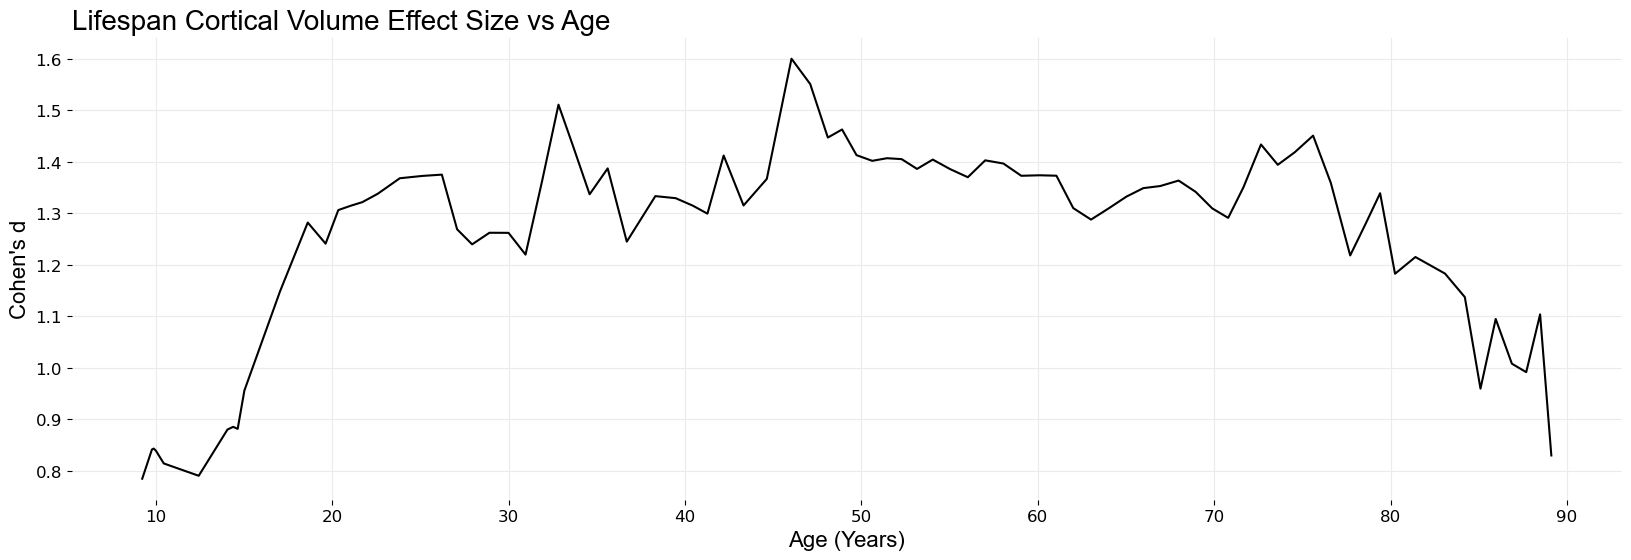

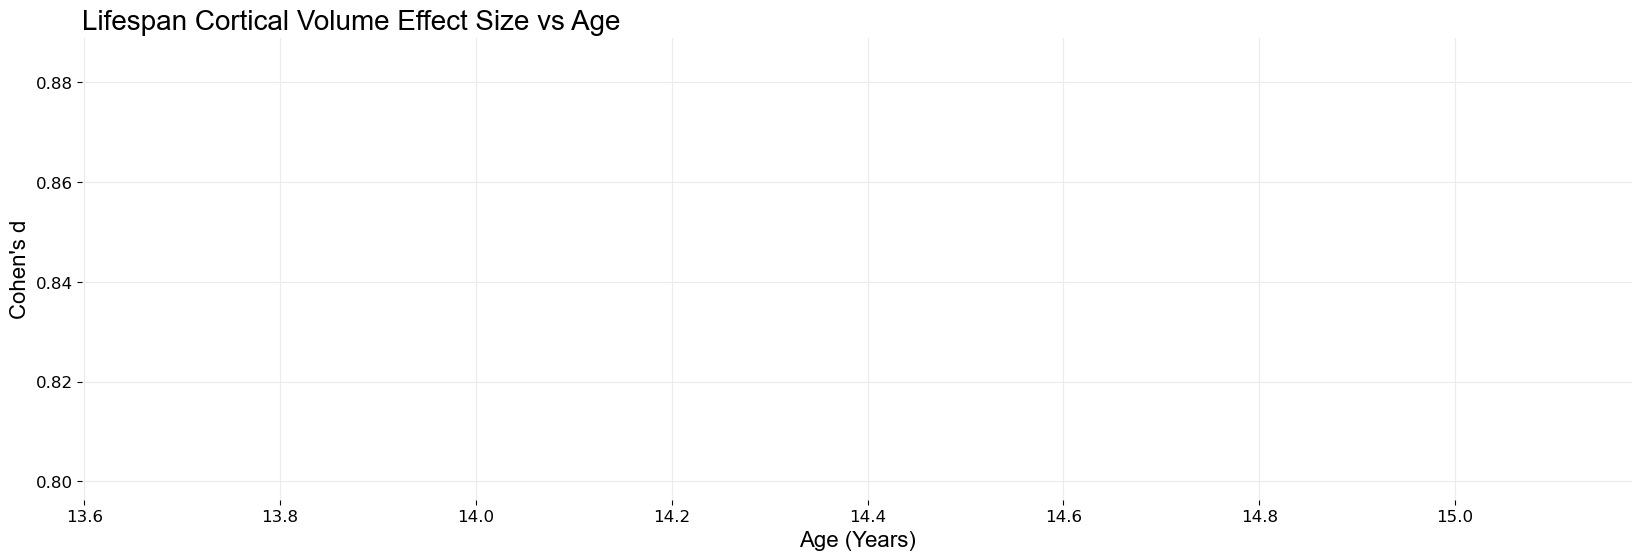

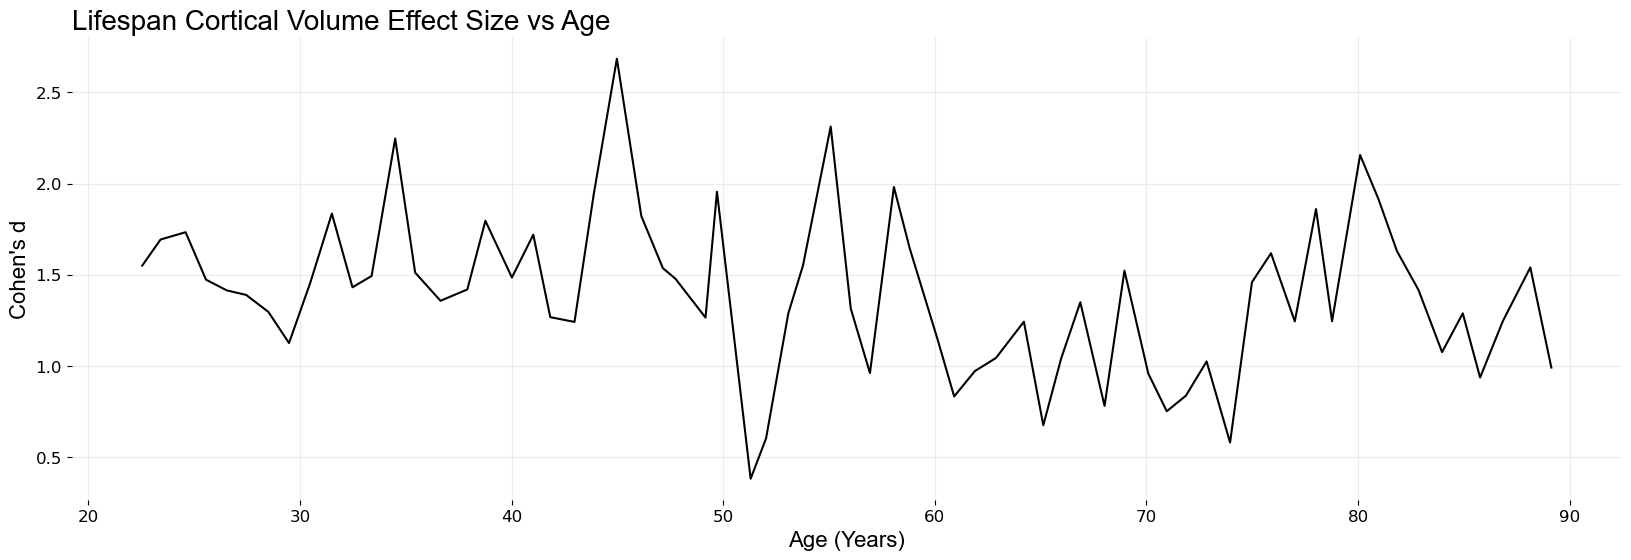

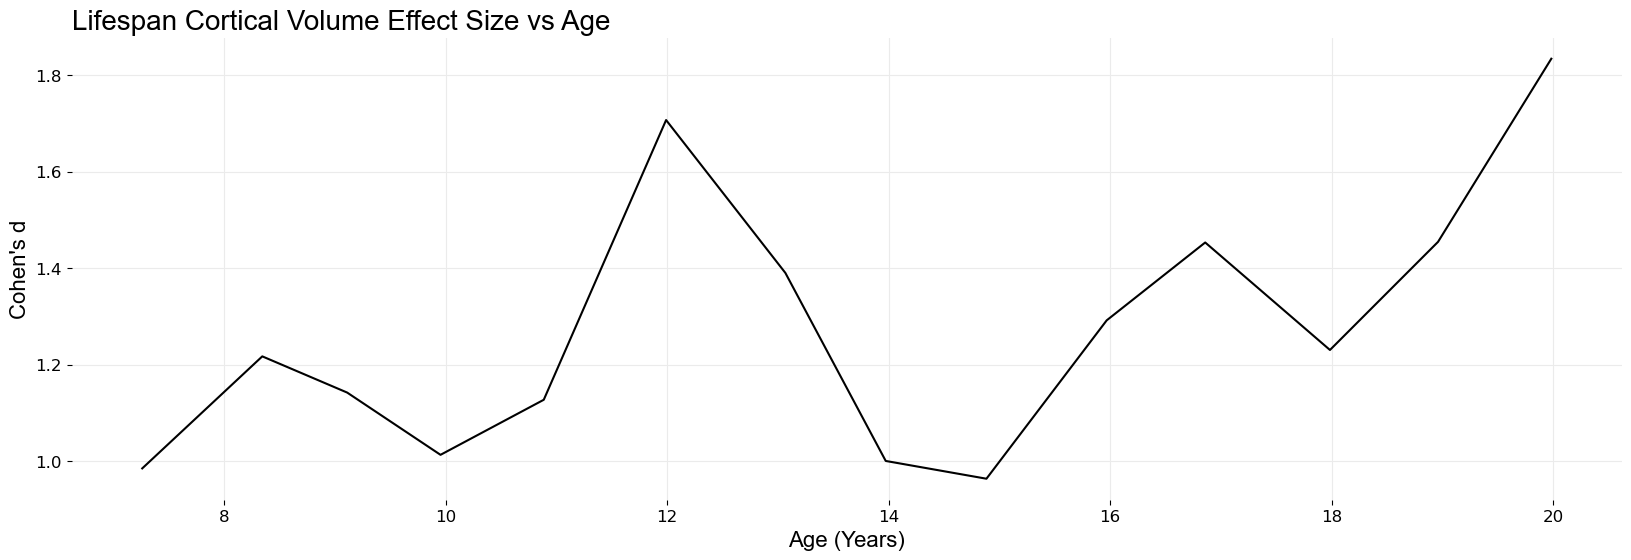

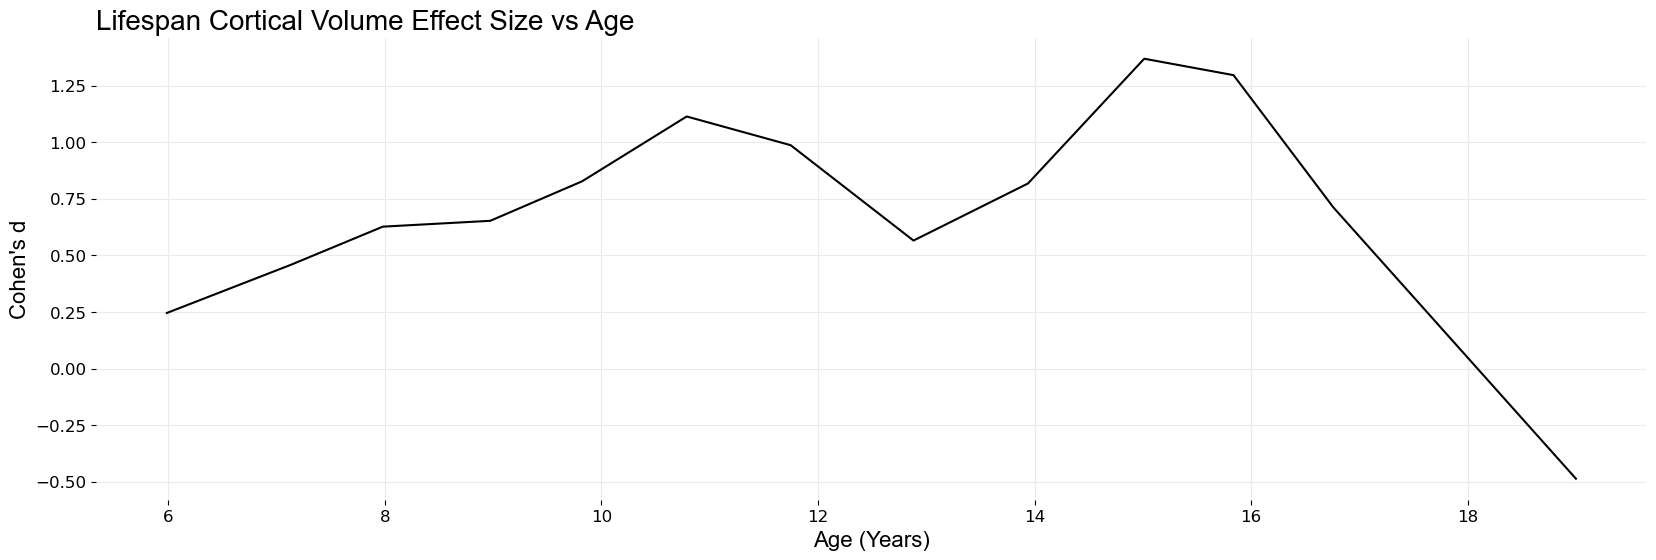

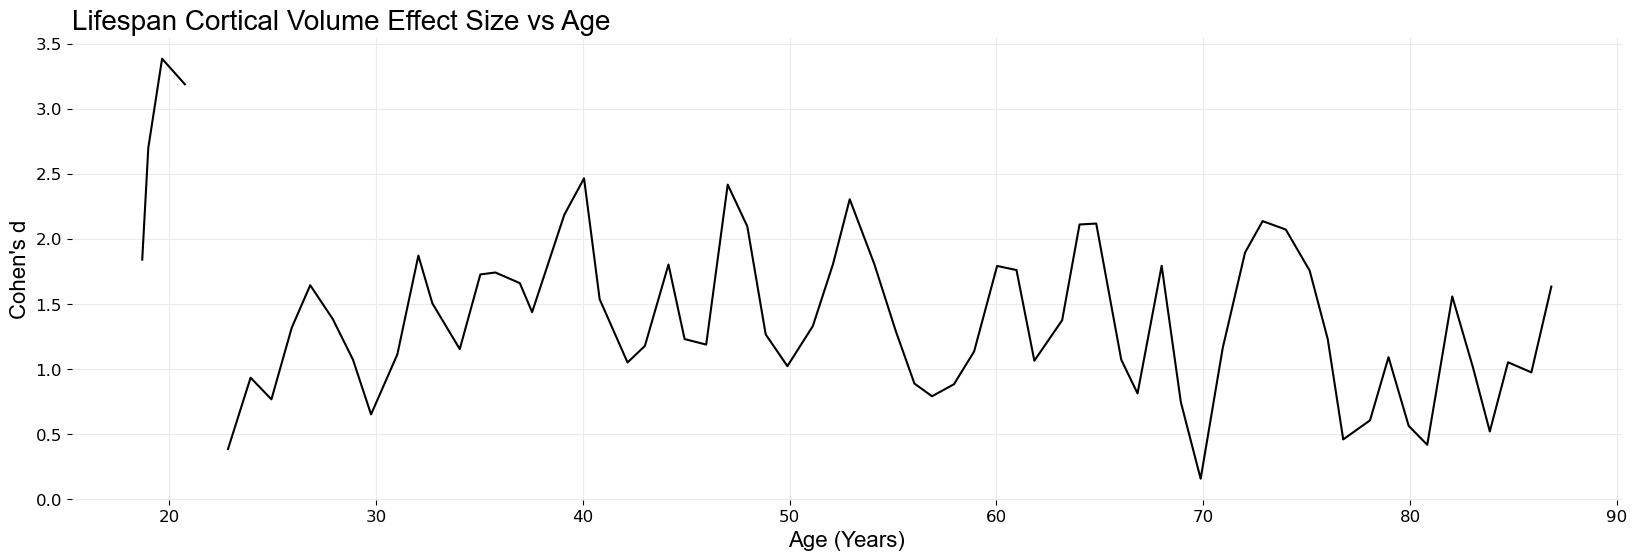

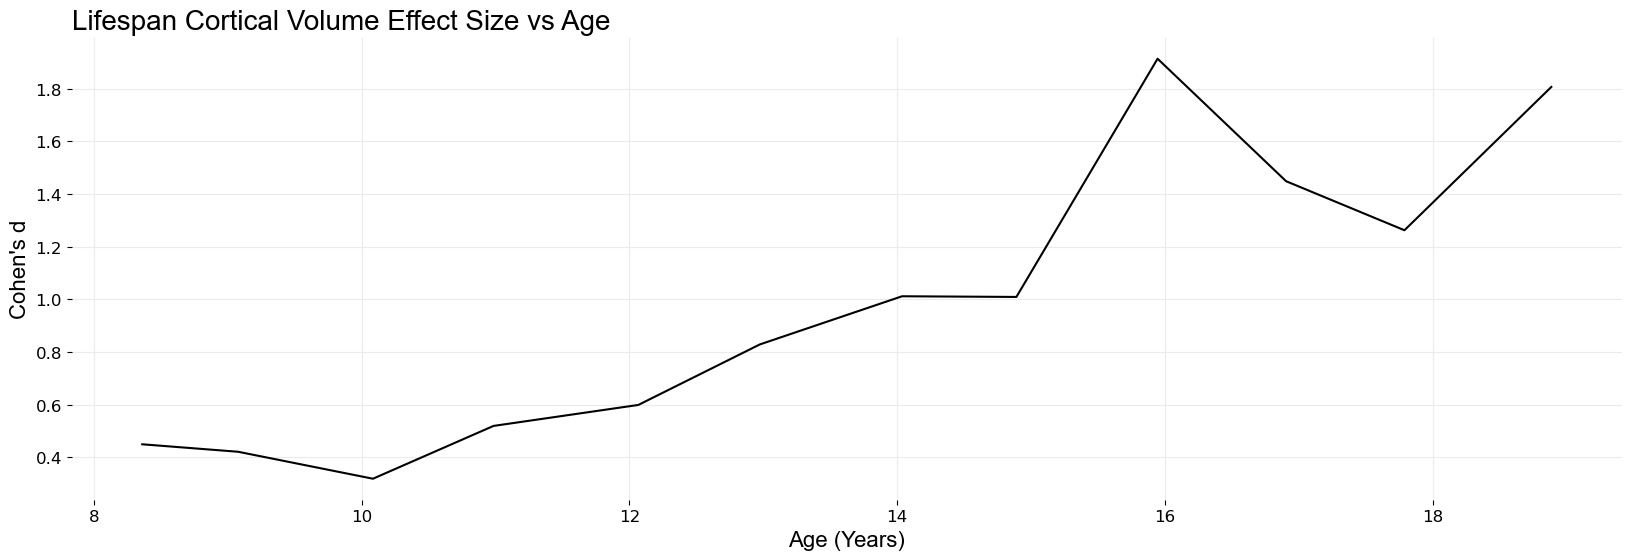

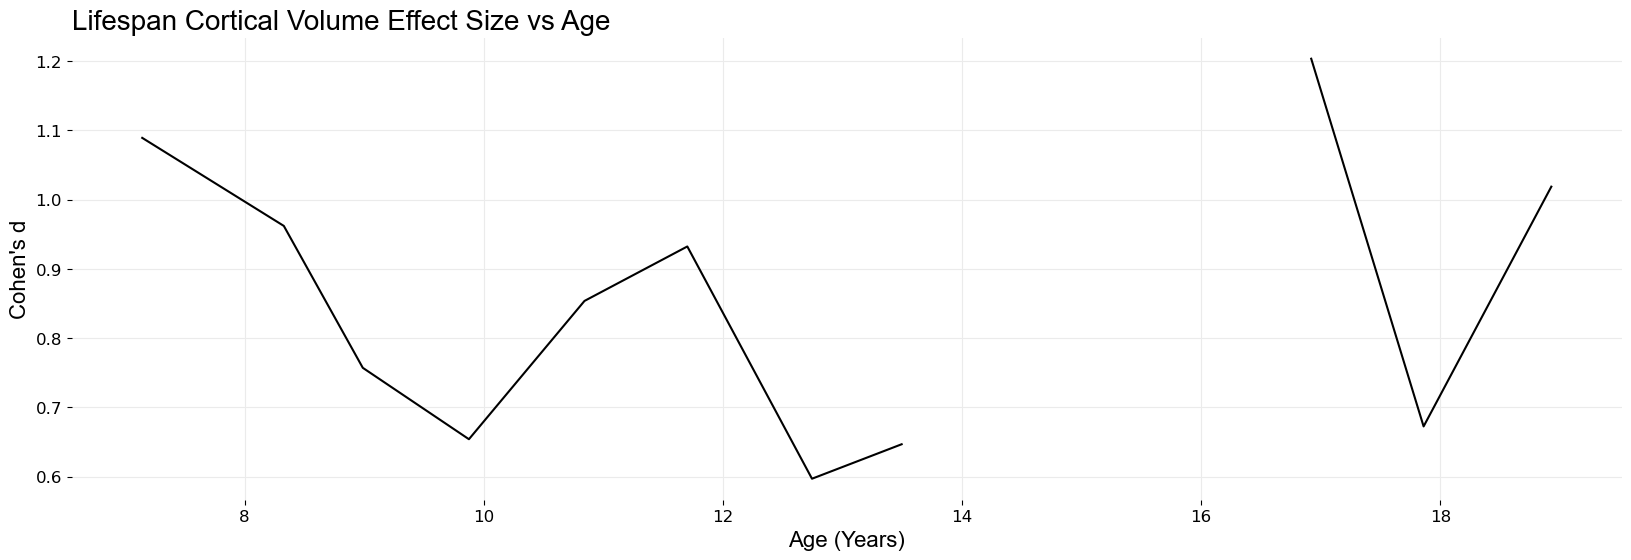

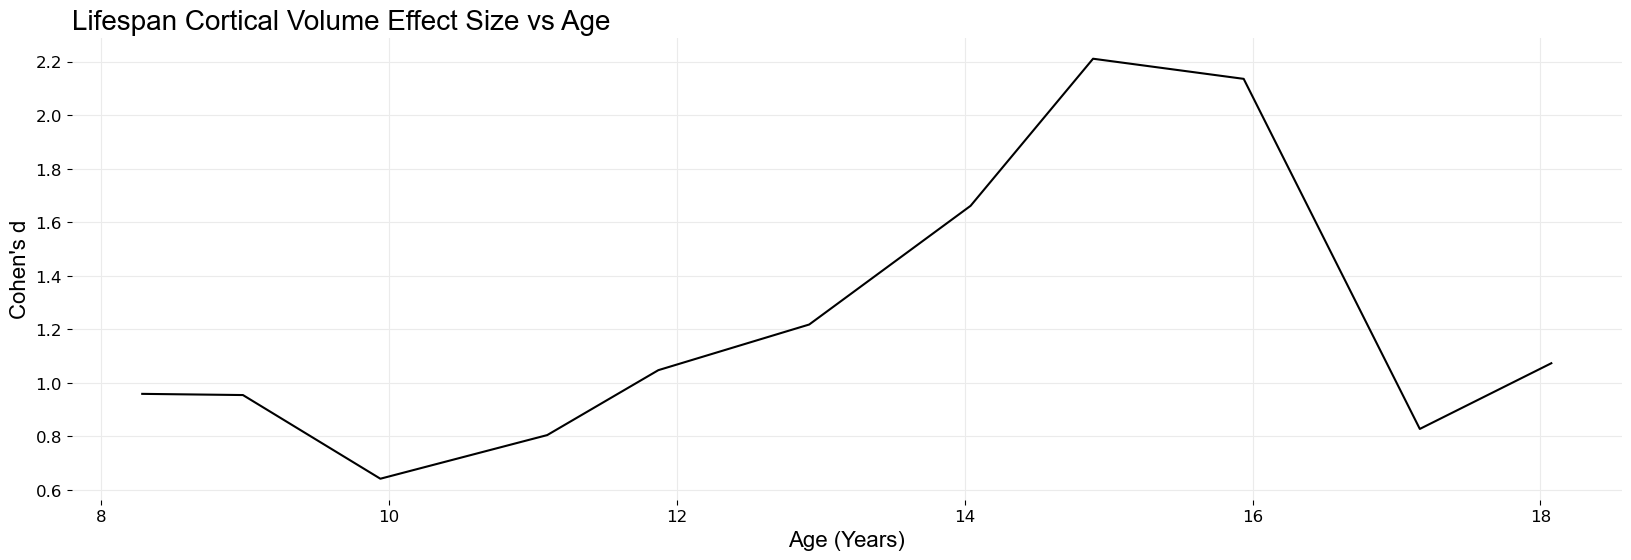

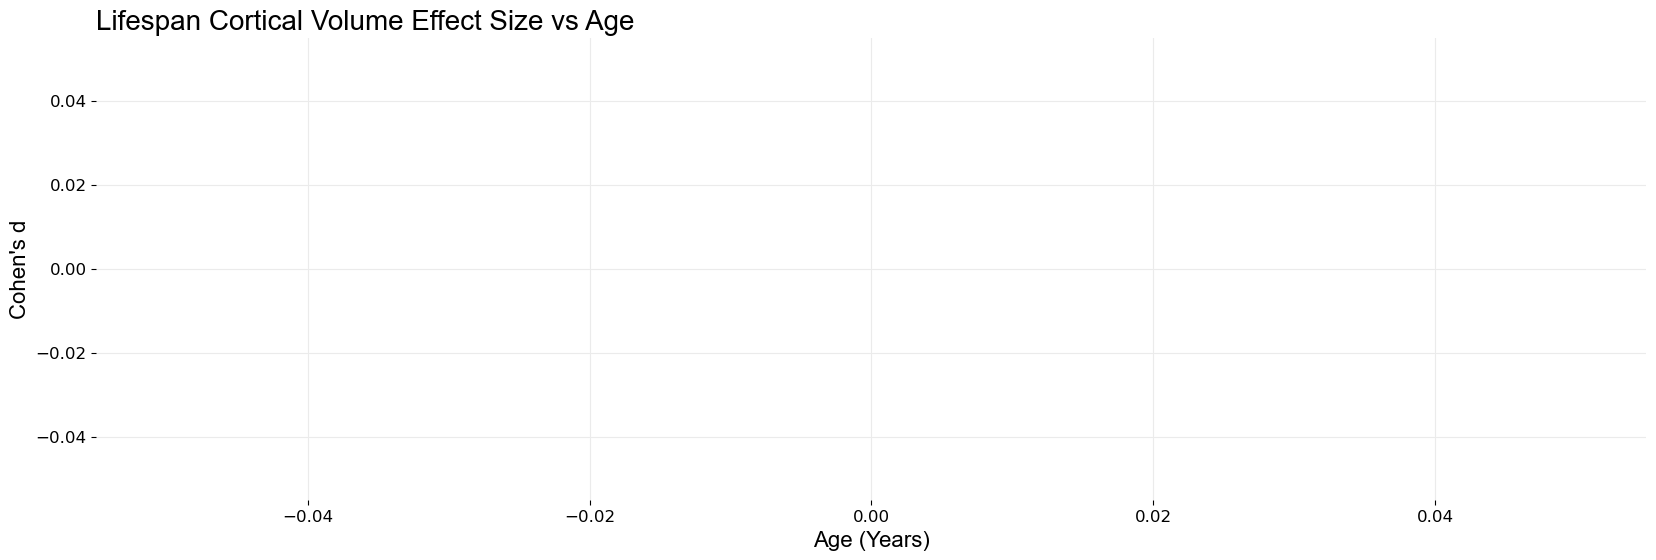

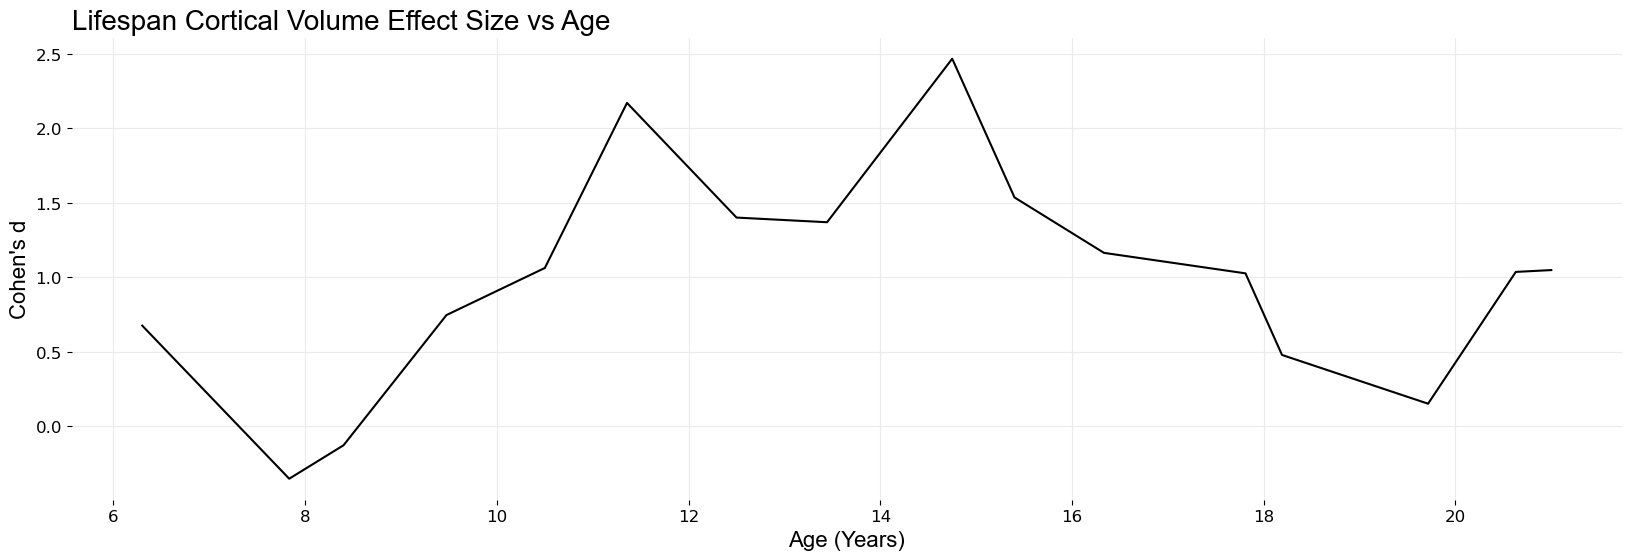

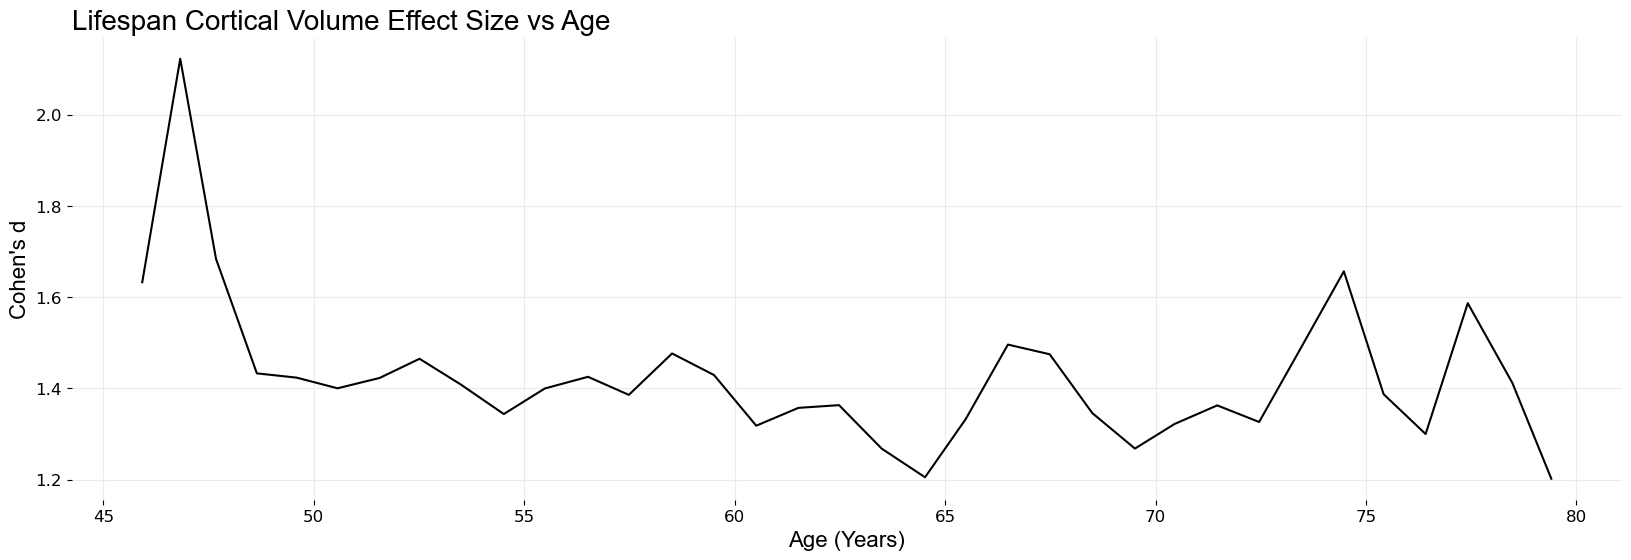

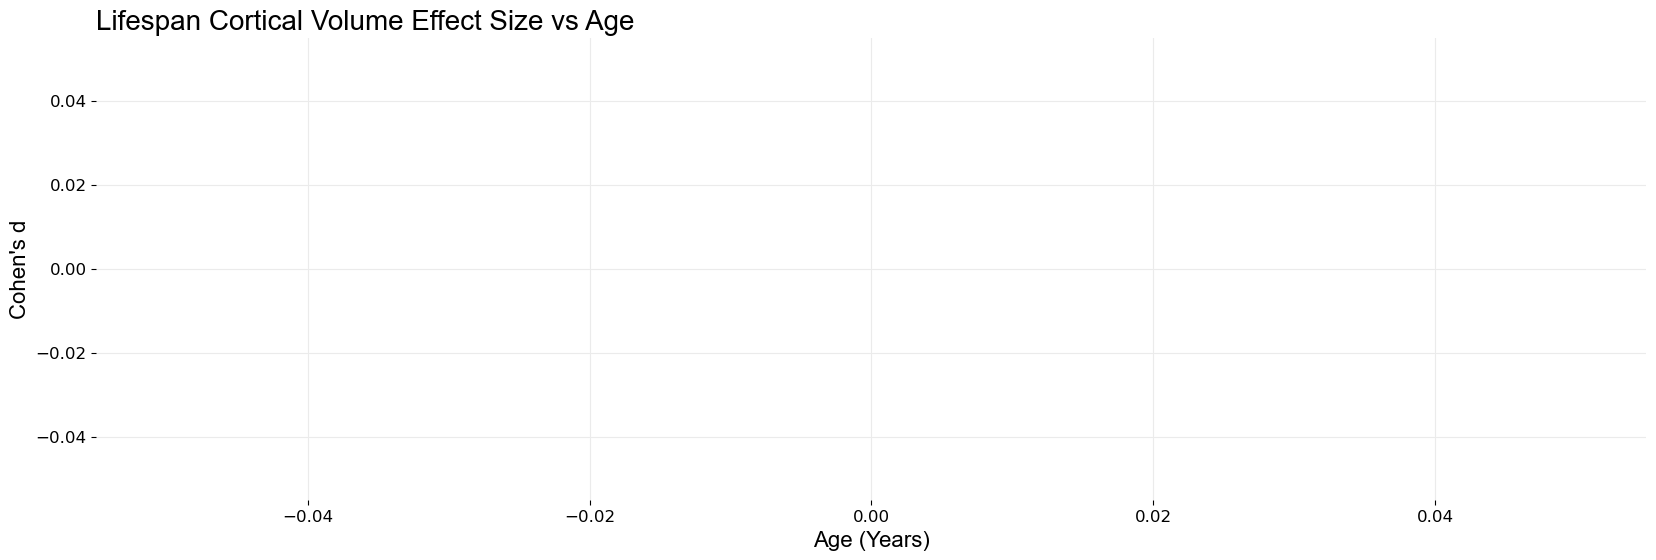

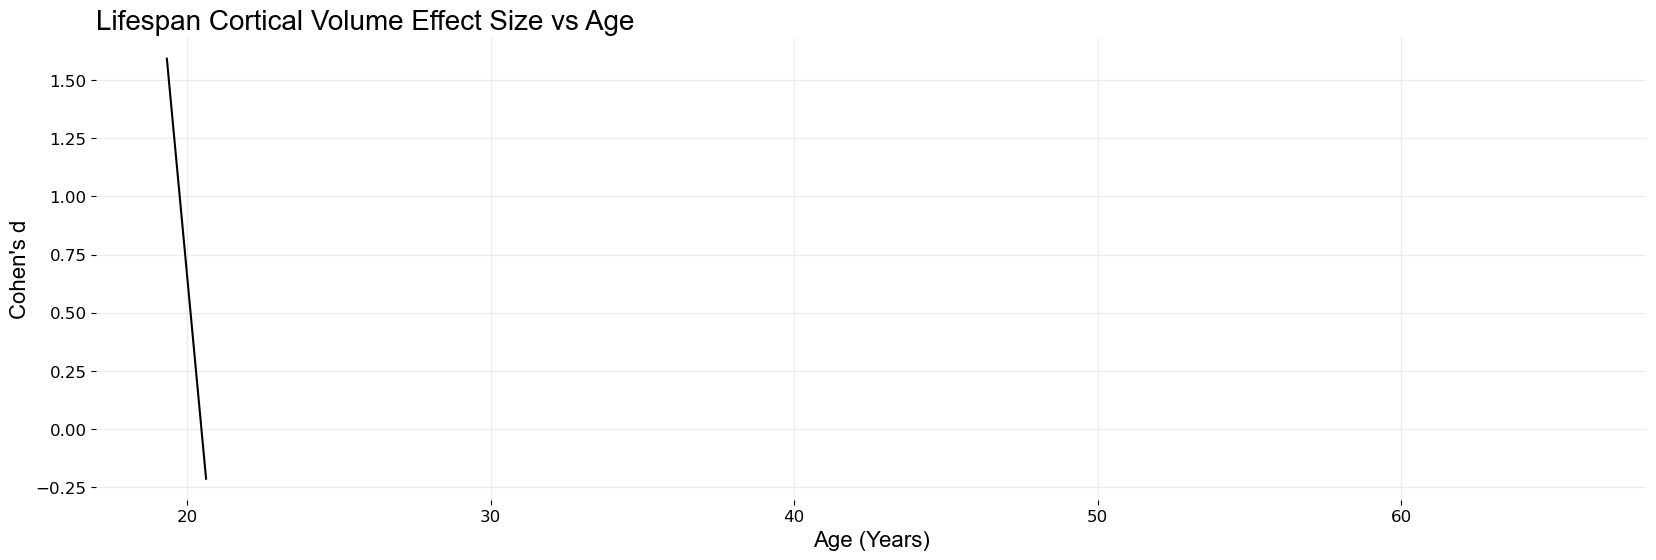

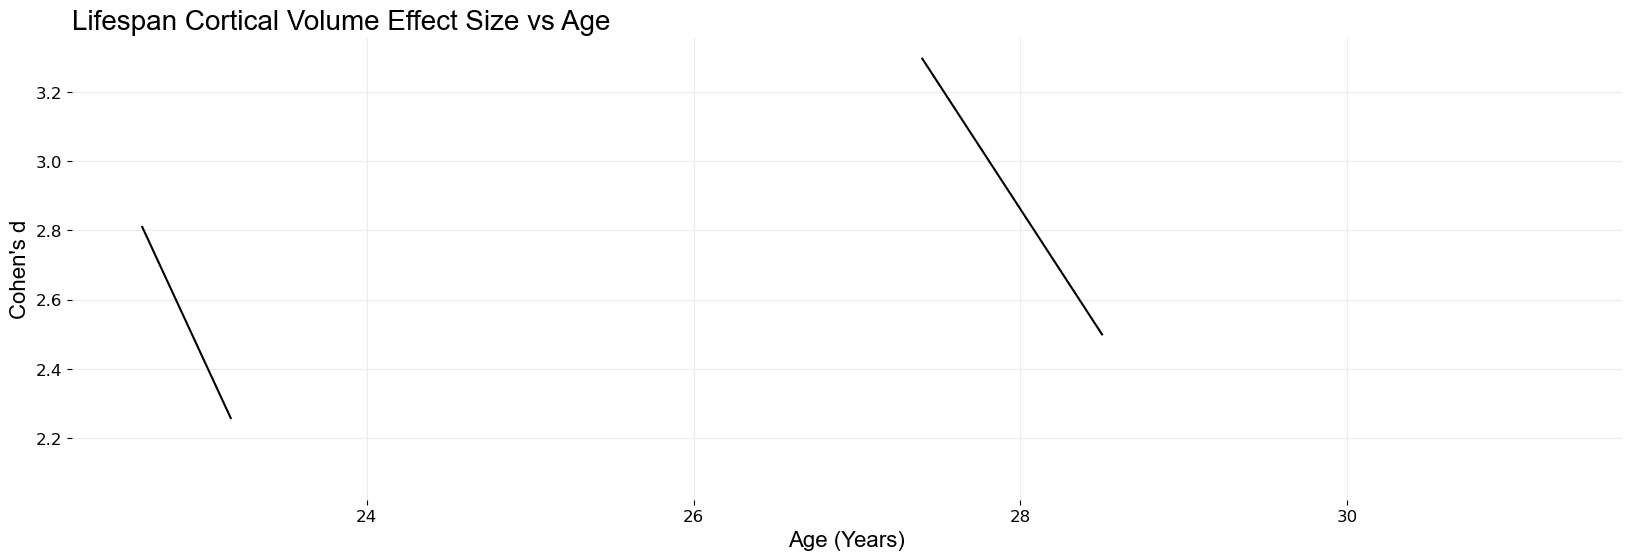

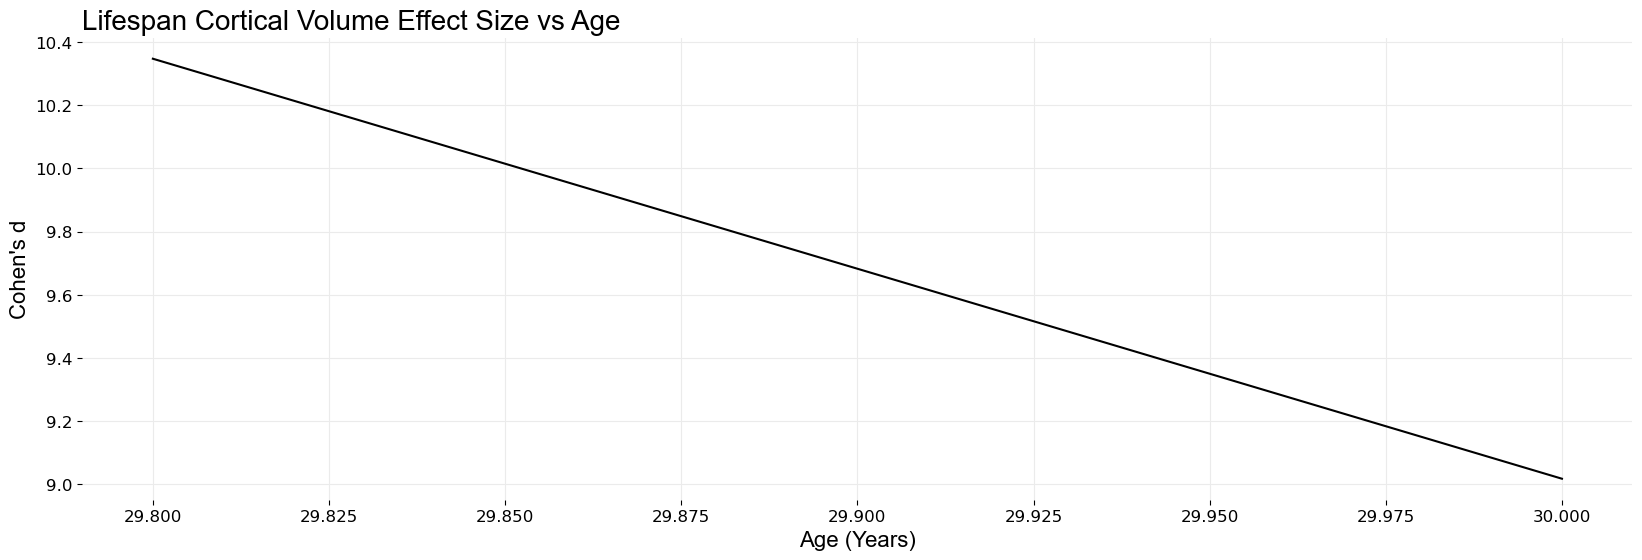

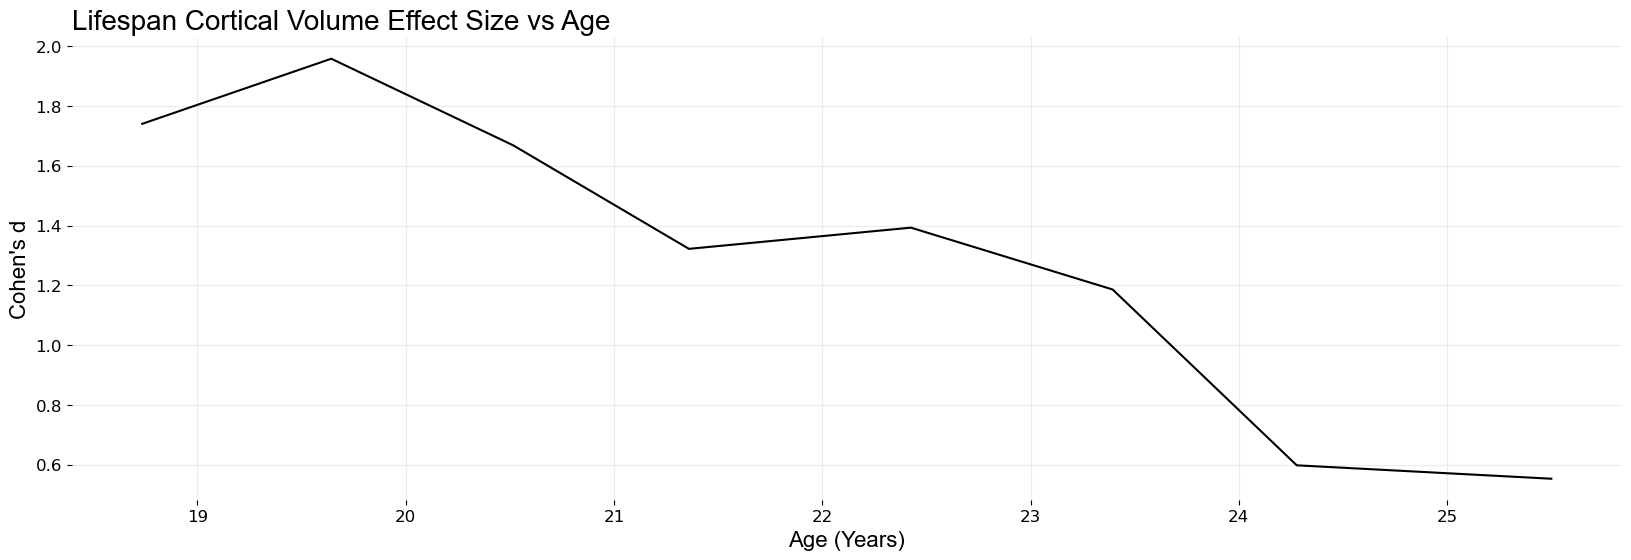

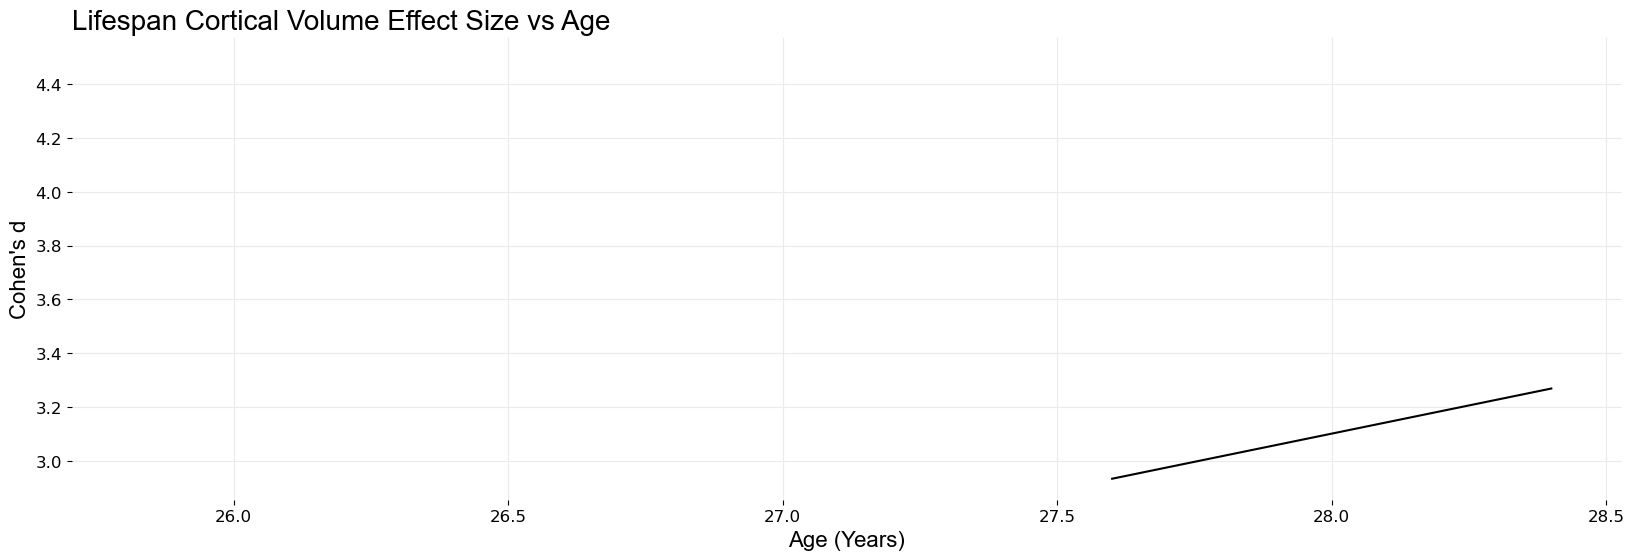

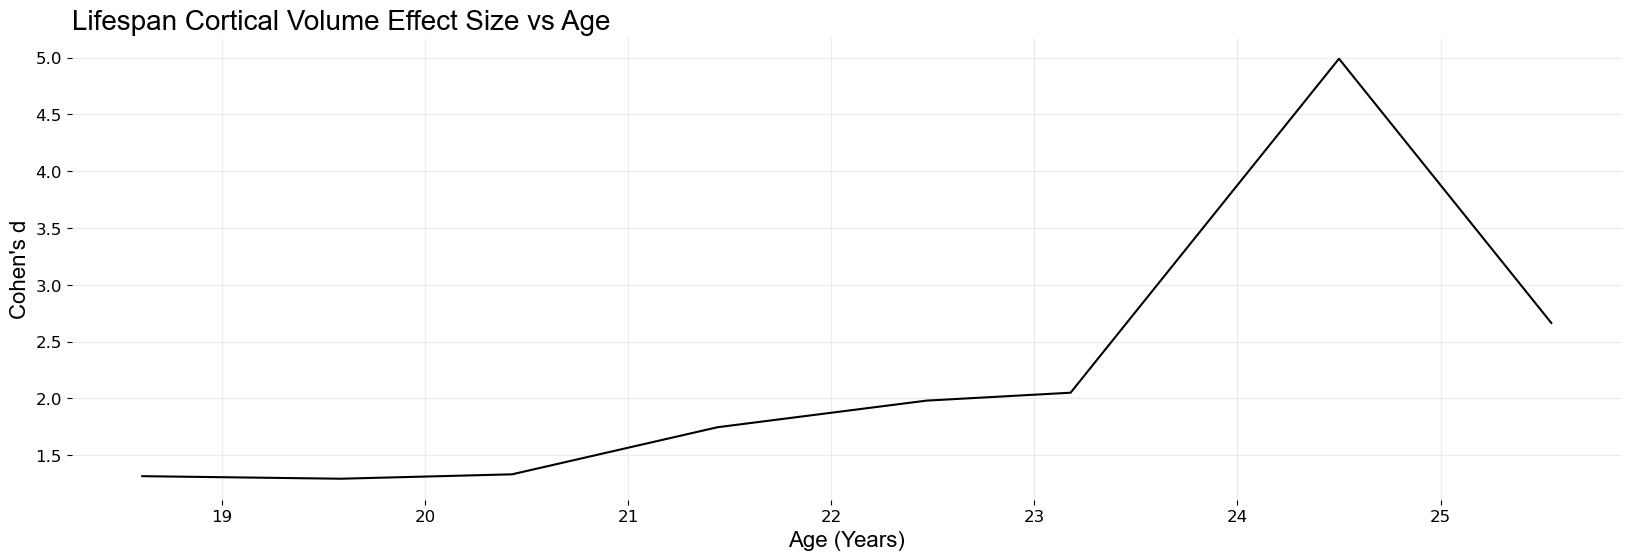

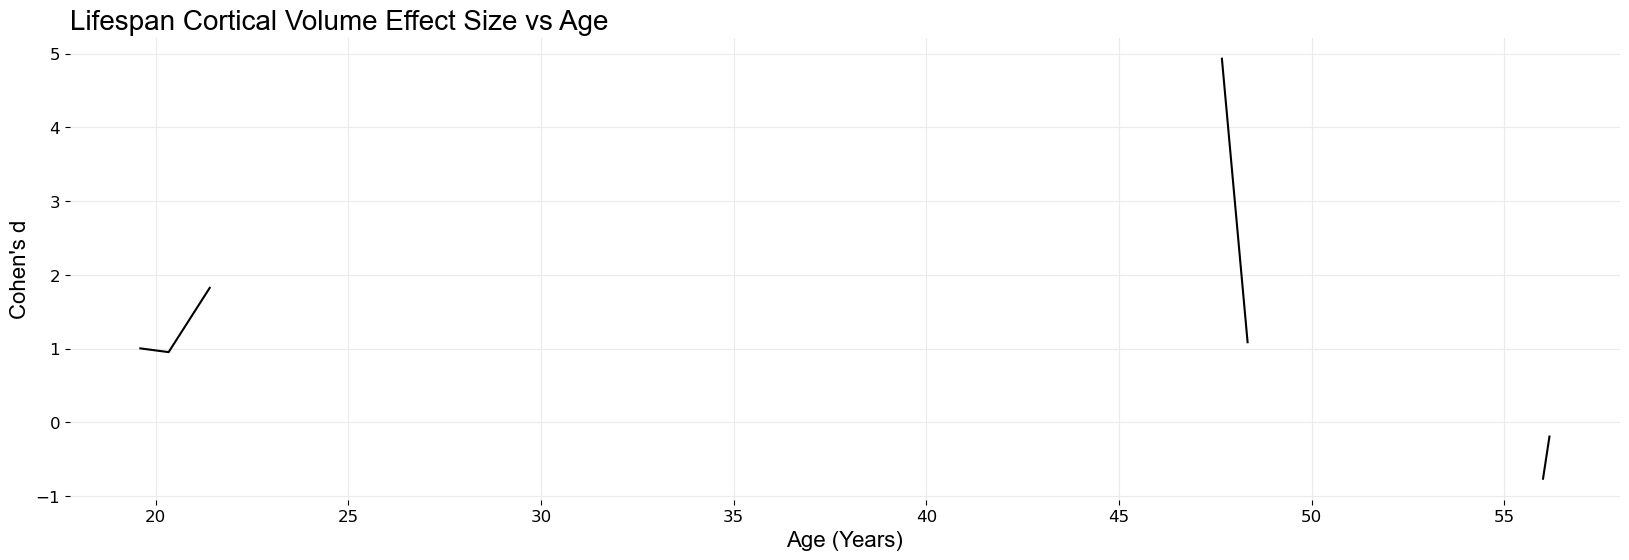

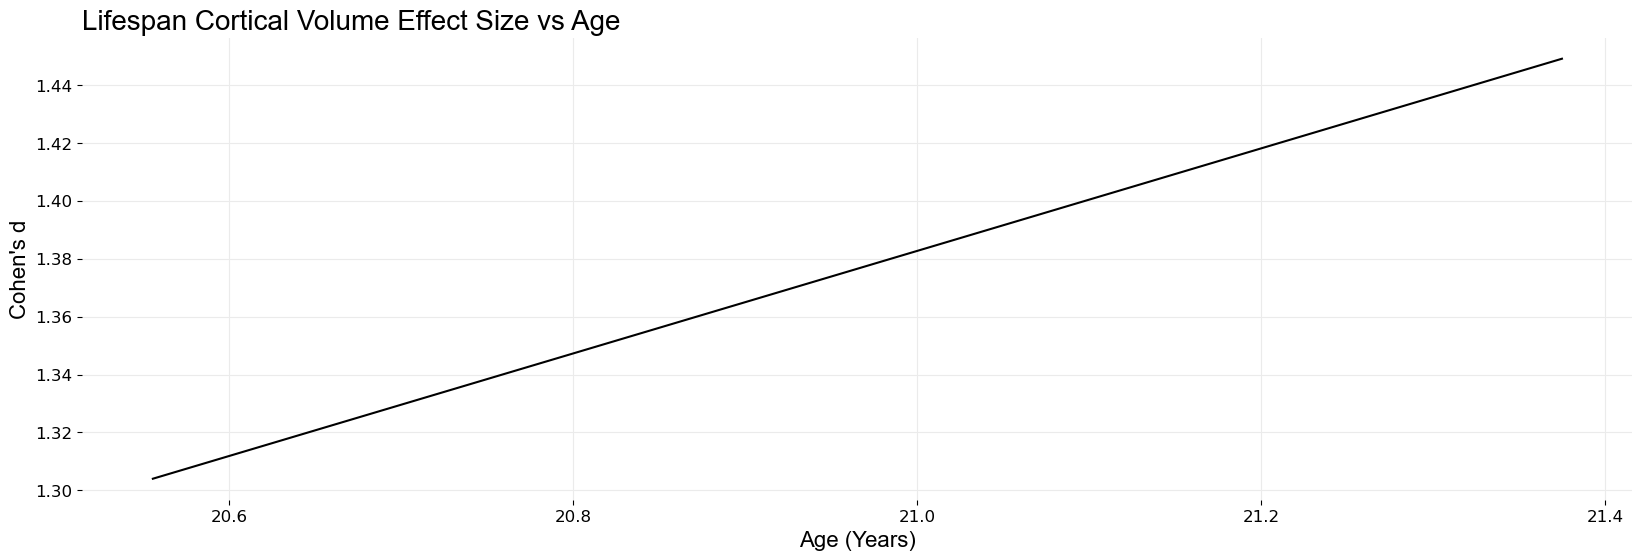

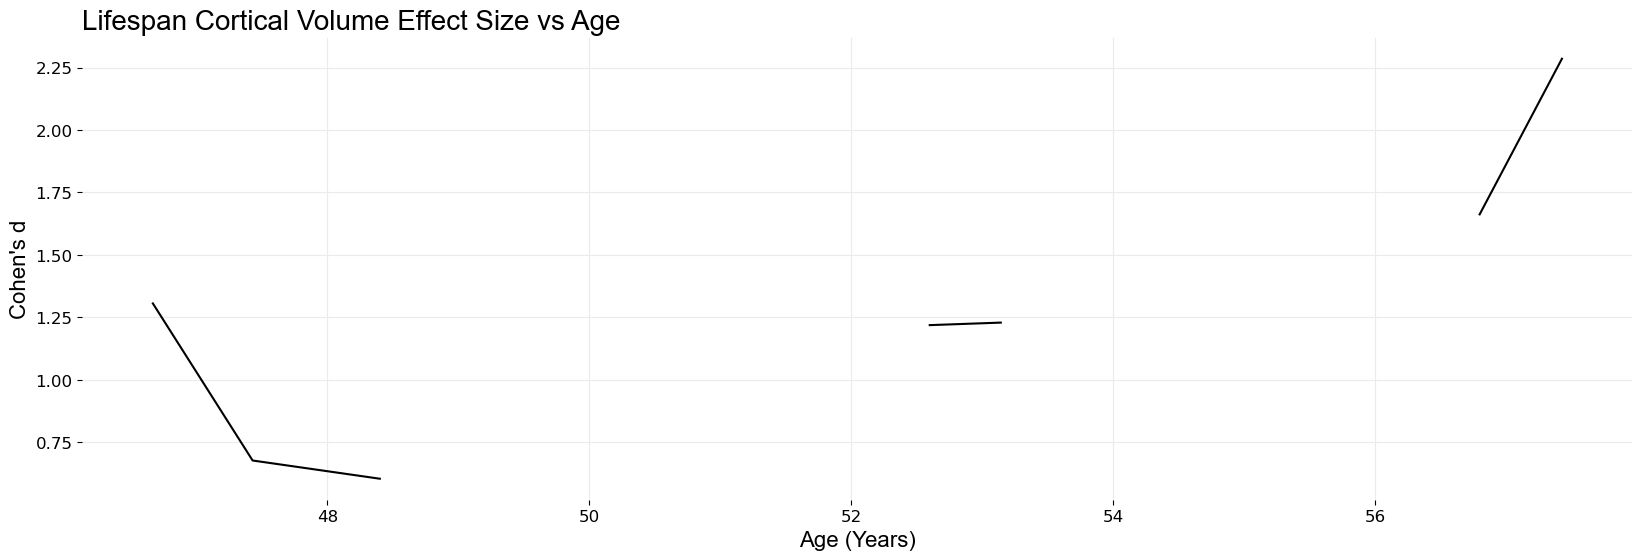

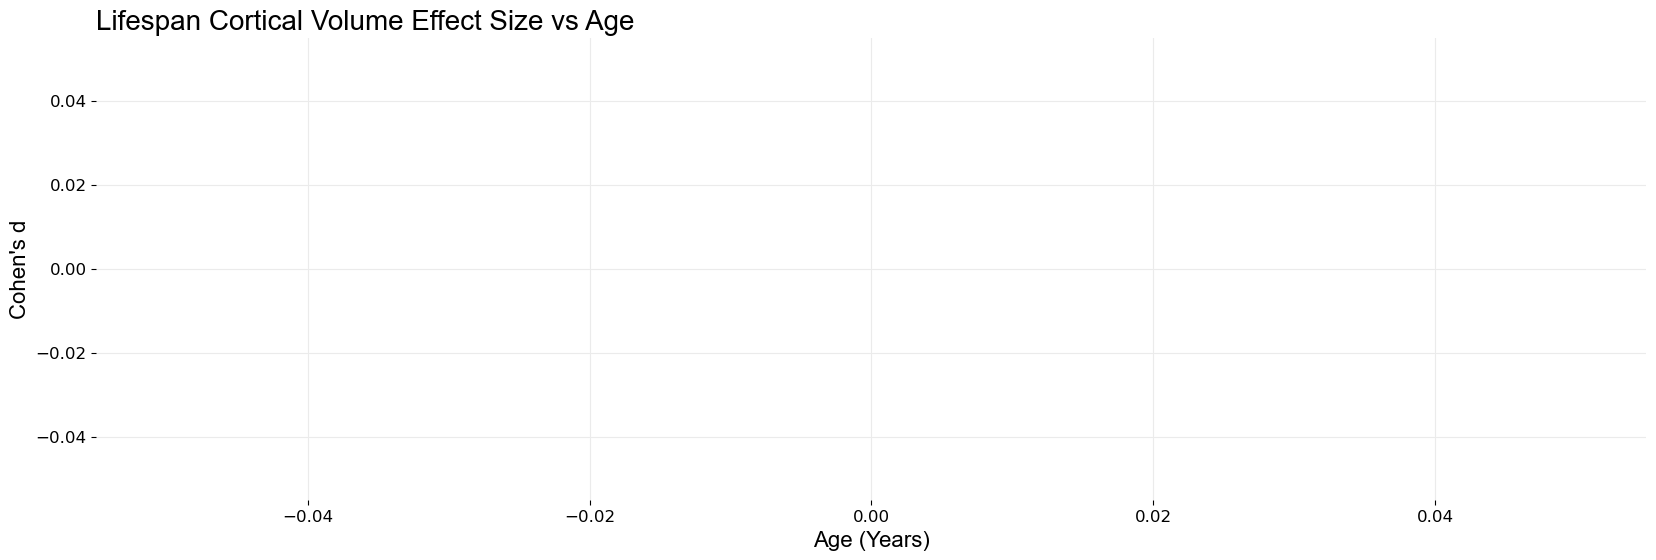

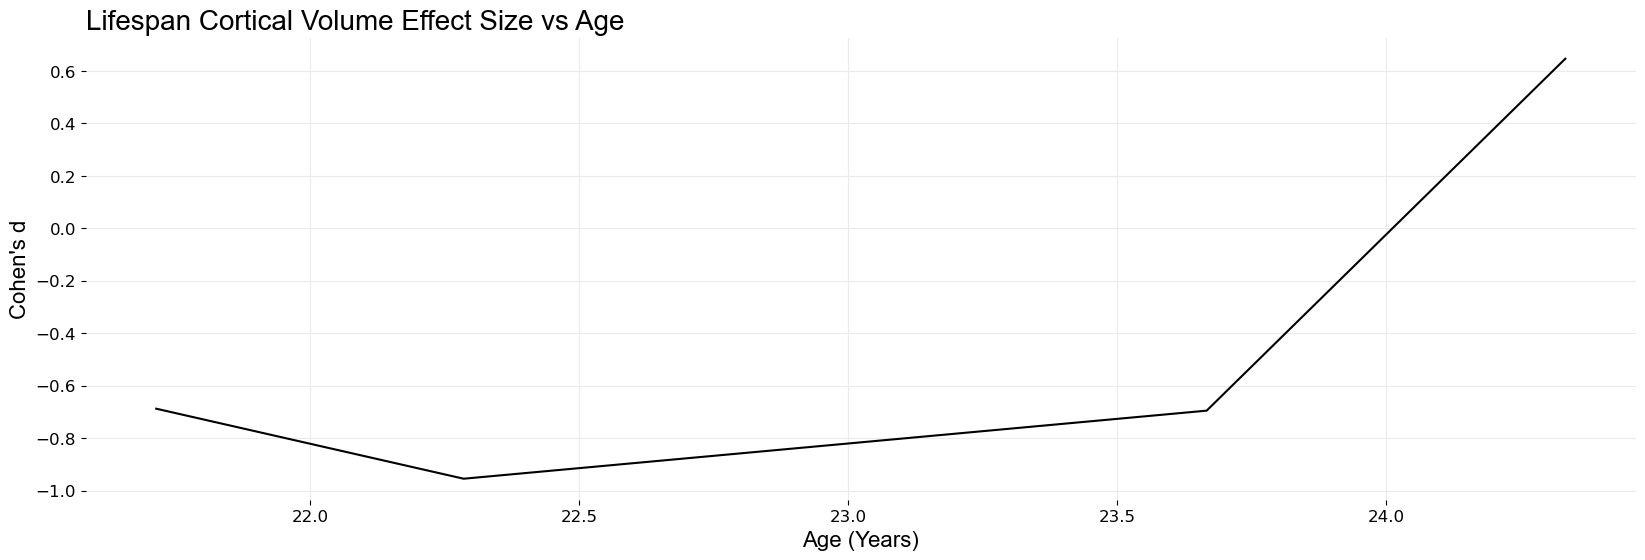

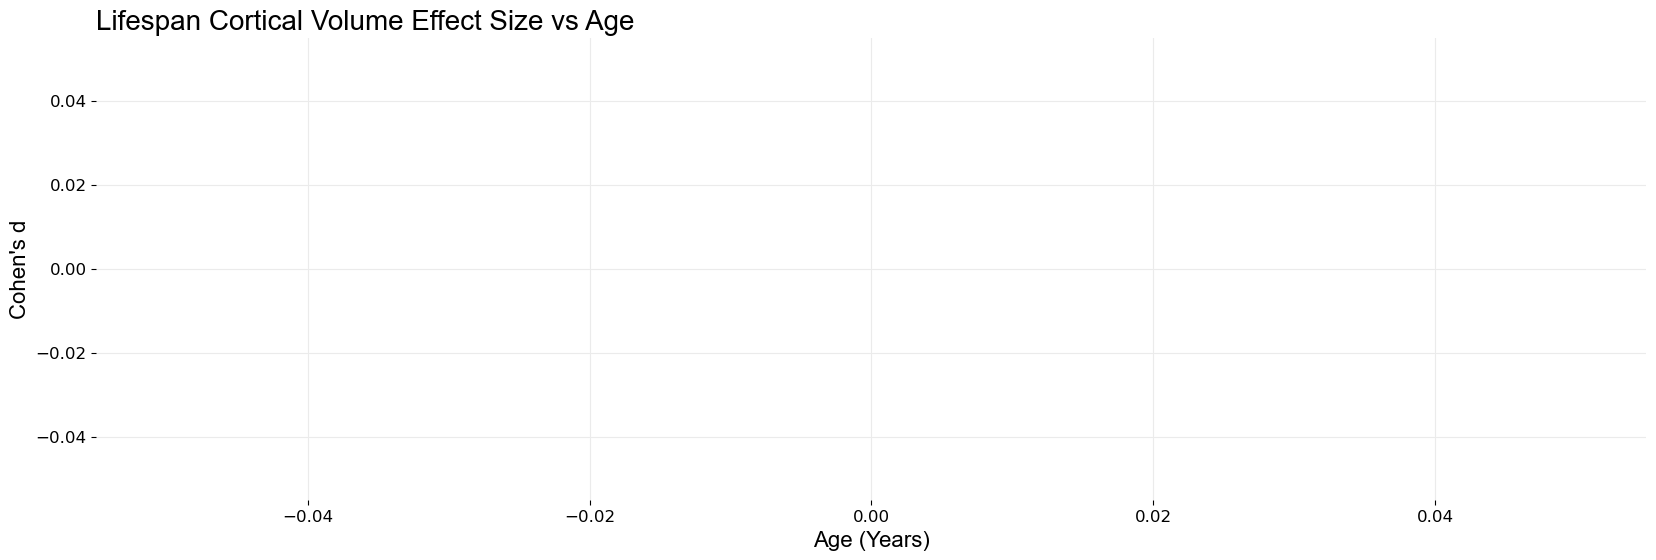

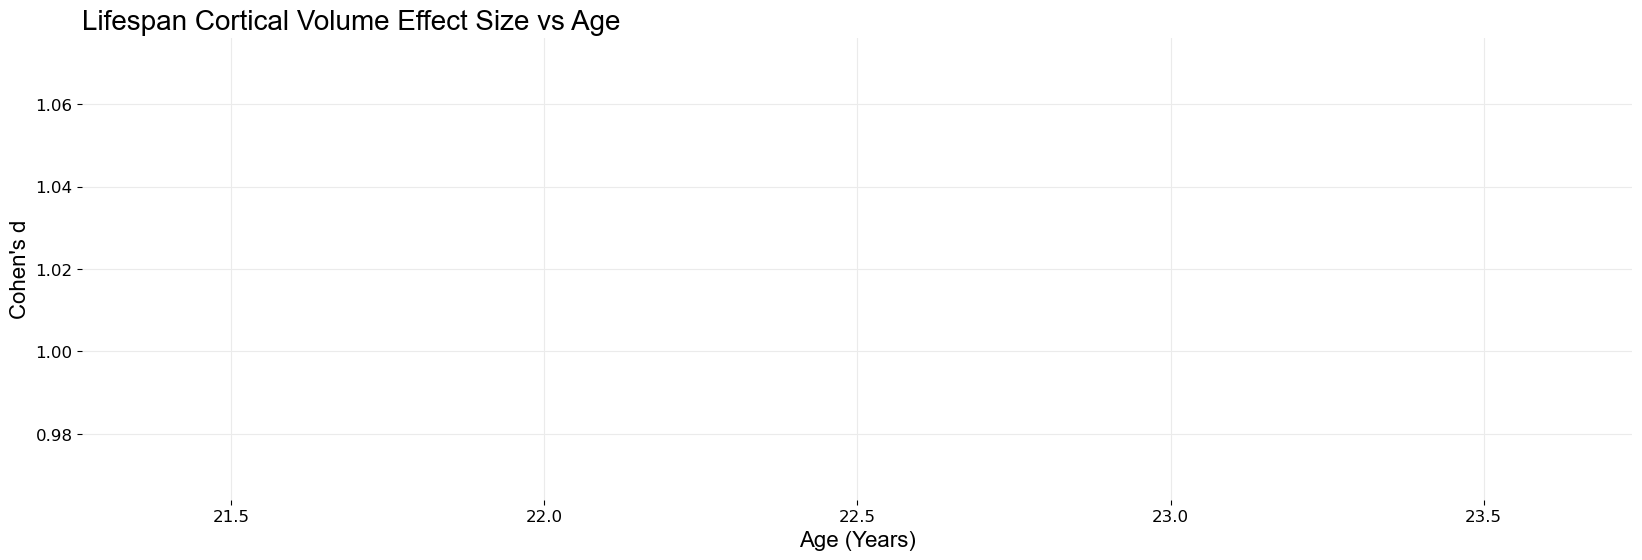

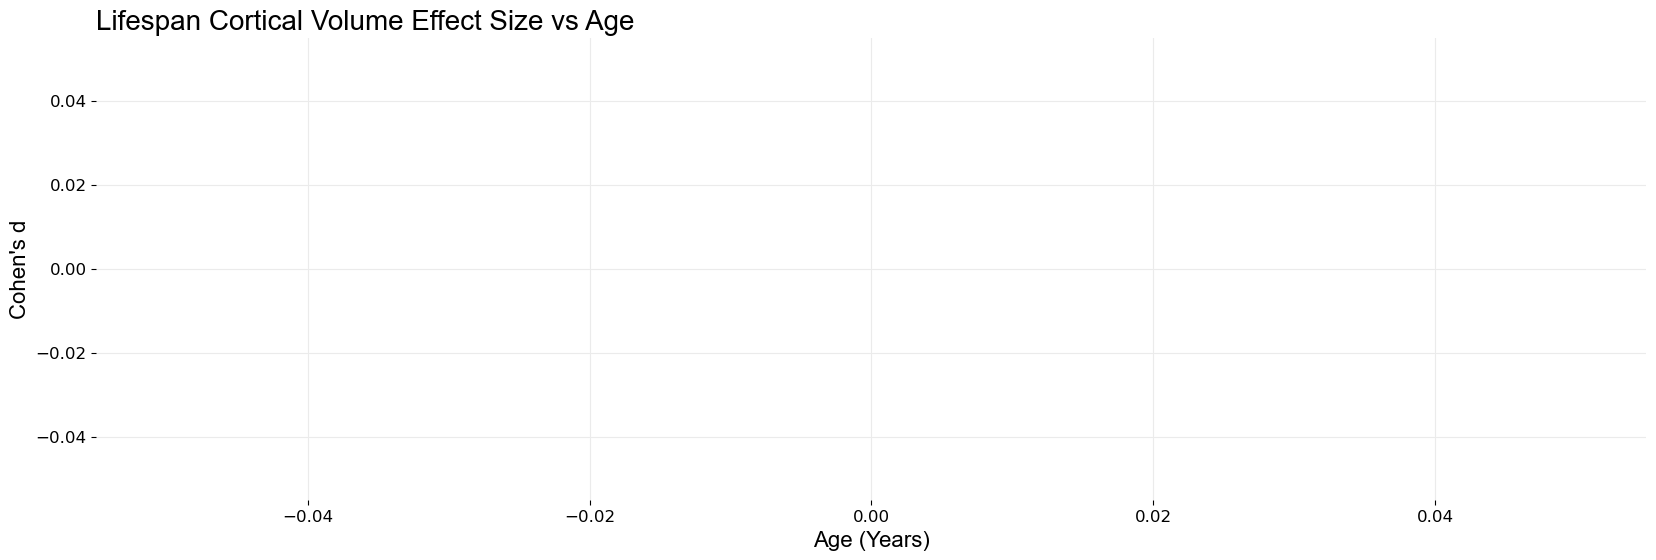

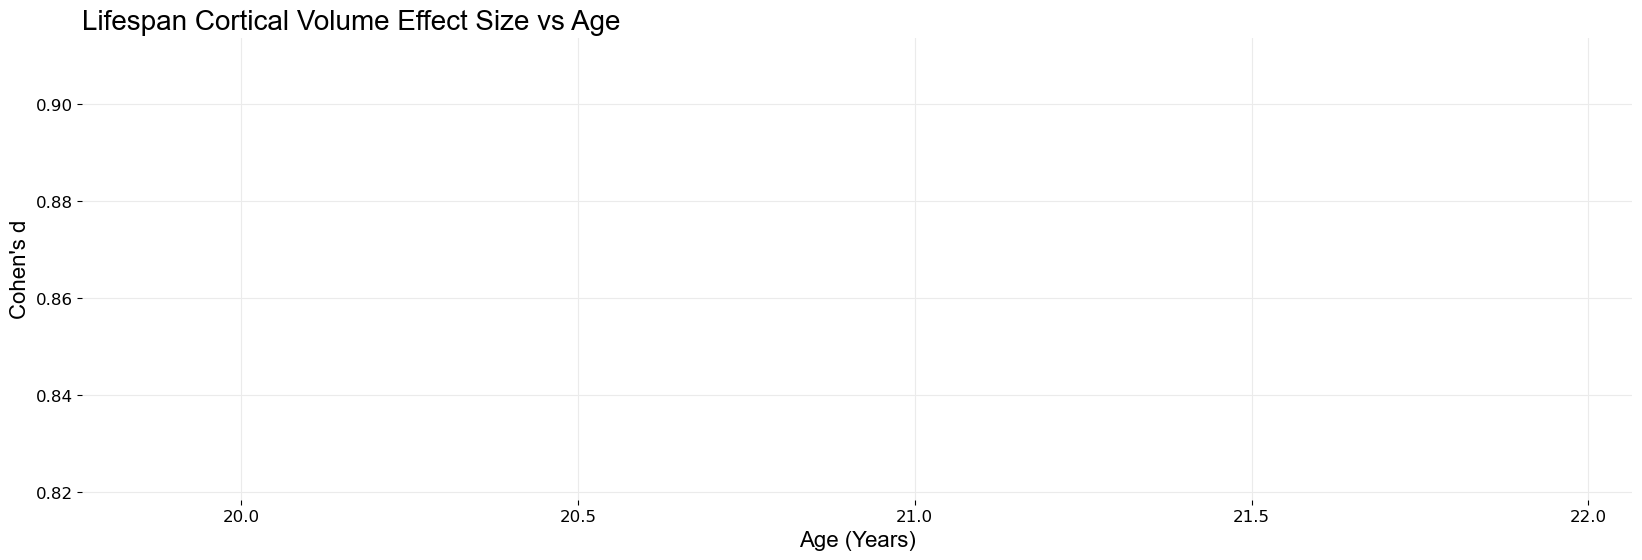

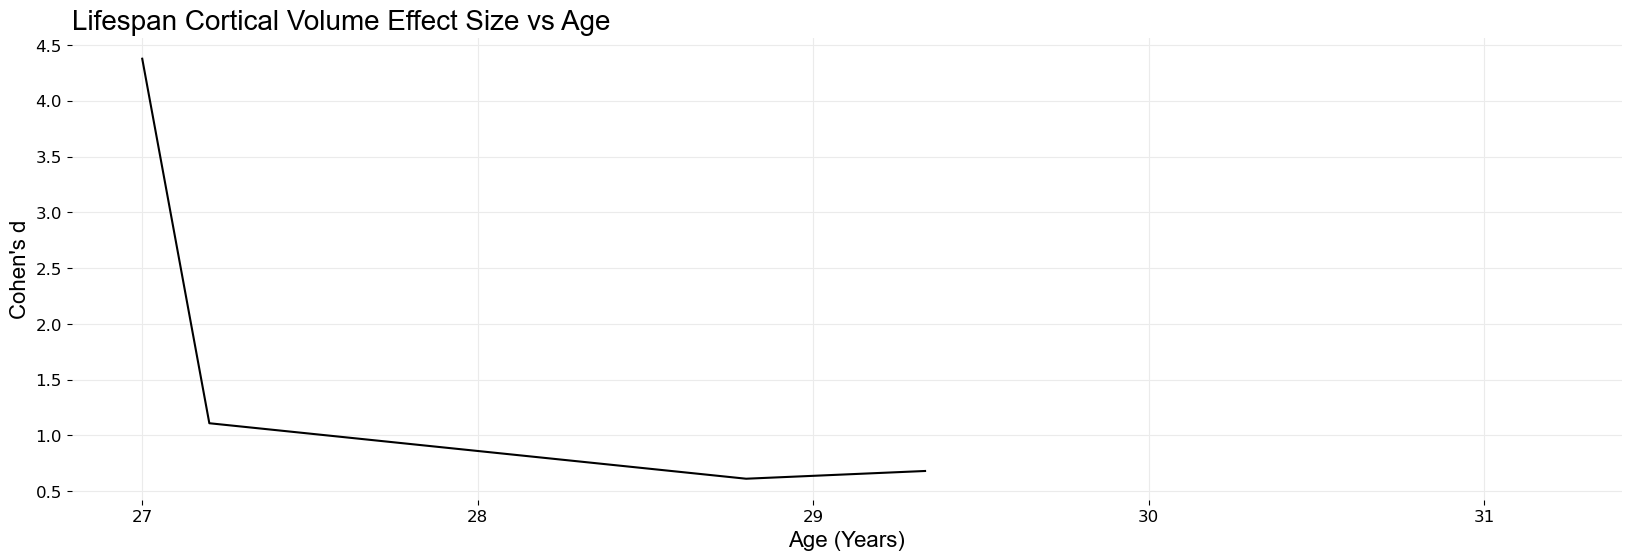

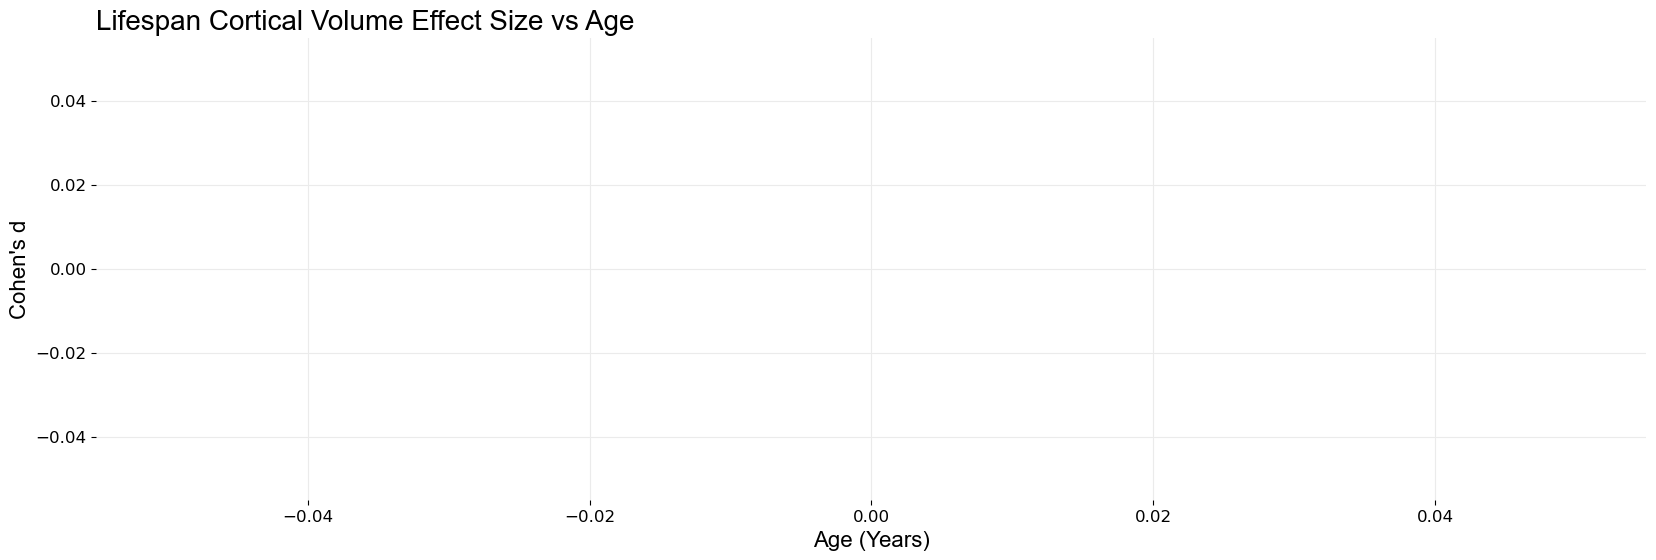

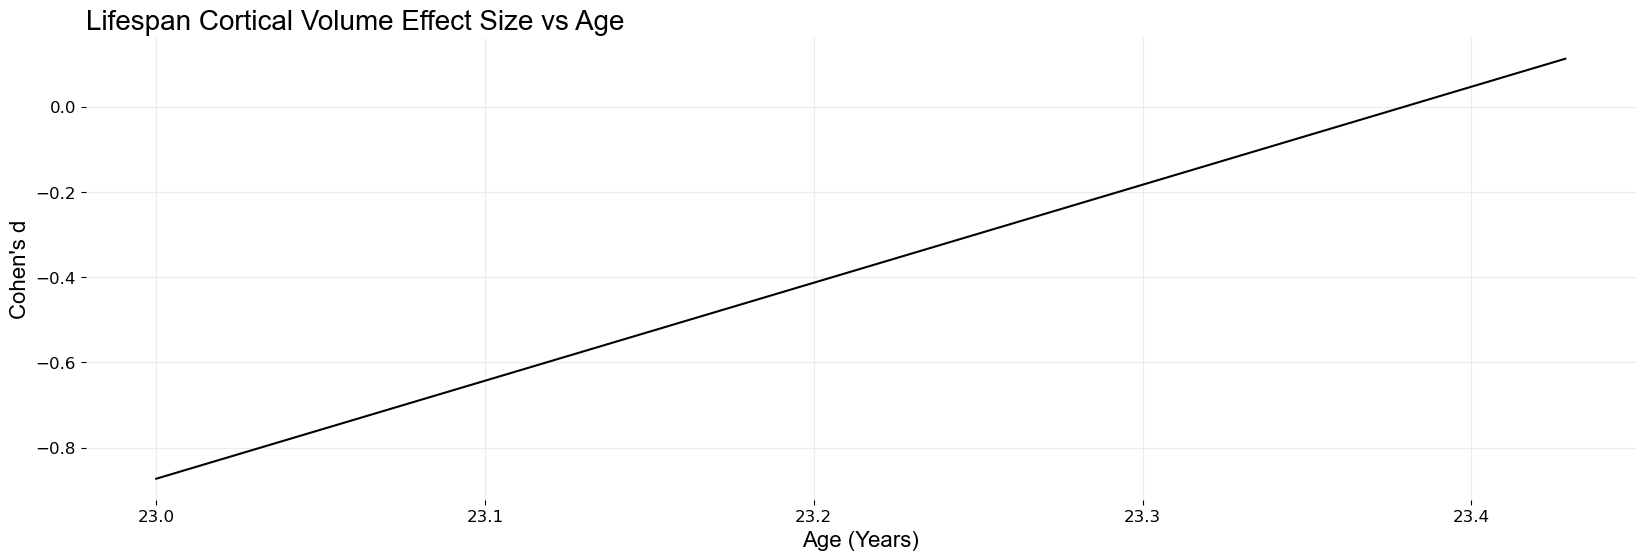

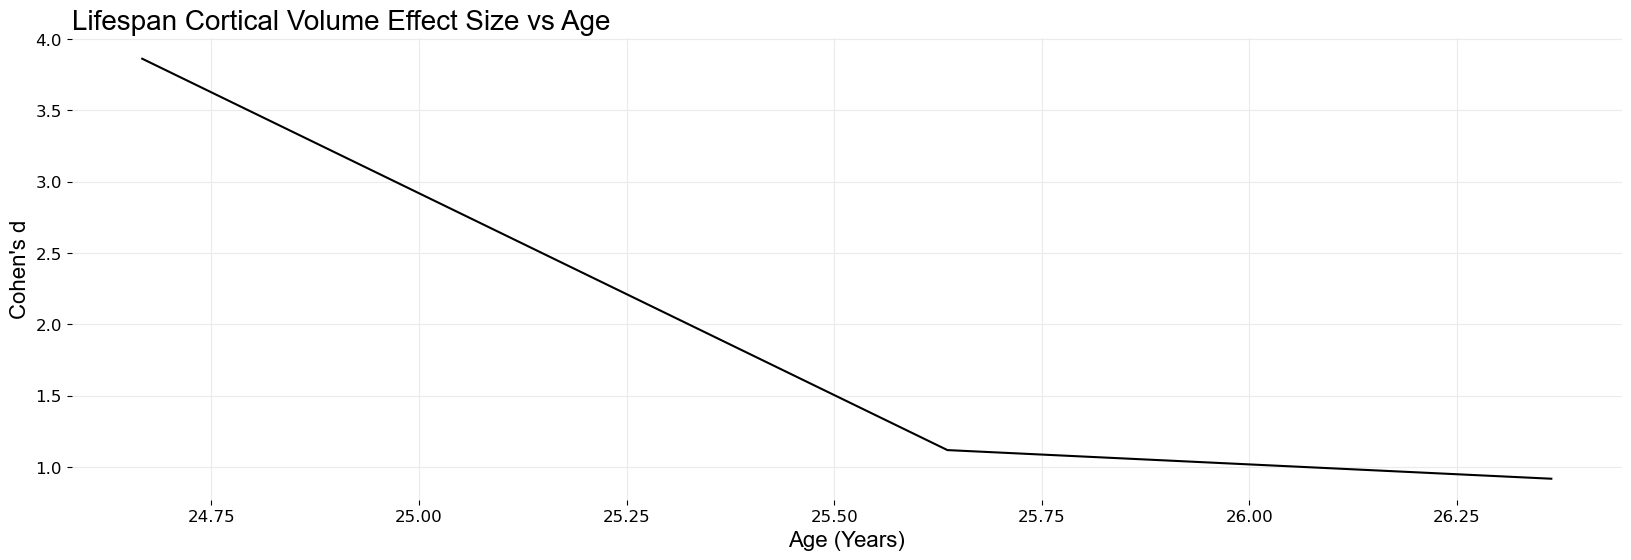

In [30]:
def calculate_avg_surface_area(df):
    return (df['LSurfArea'] + df['RSurfArea']) / 2

def calculate_avg_thickness(df):
    return (df['LThickness'] + df['RThickness']) / 2

def calculate_volume(df):
    return df['AvgSurfArea'] * df['AvgThickness']

def analyze_dataset_age(dataset, dataset_name, window_size_age, step_size_age):
    cohens_d_surf_area = []
    cohens_d_thickness = []
    cohens_d_icv = []
    cohens_d_volume = []
    window_age = []
    
    def cohen_d(male_data, female_data):
        pooled_std = np.sqrt((male_data.std() ** 2 + female_data.std() ** 2) / 2)
        return (male_data.mean() - female_data.mean()) / pooled_std

    min_age = round(dataset['age'].min())
    max_age = round(dataset['age'].max())
    
    for age_group in range(min_age, max_age - window_size_age, step_size_age):
            
            window = dataset[(dataset['age'] >= age_group) & (dataset['age'] < age_group + window_size_age)].copy()

            window.loc[:, 'AvgSurfArea'] = calculate_avg_surface_area(window)
            window.loc[:, 'AvgThickness'] = calculate_avg_thickness(window)
            window.loc[:, 'AvgVolume'] = calculate_volume(window)
        
            male_data = window[window['sex'] == 1]
            female_data = window[window['sex'] == 2]

            if len(male_data) > 0 and len(female_data) > 0:
                window_age.append(window['age'].mean())
                cohens_d_volume.append(cohen_d(male_data['AvgVolume'], female_data['AvgVolume']))
            
    plt.figure(figsize=(20, 6))
    plt.plot(window_age, cohens_d_volume, color = 'black')
    plt.xlabel('Age (Years)', fontname='Arial', fontsize=16)
    plt.ylabel("Cohen's d", fontname='Arial', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f'Lifespan Cortical Volume Effect Size vs Age', fontname='Arial', fontsize=20, loc = 'left')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.grid(True, color=(235/255, 235/255, 235/255))
    plt.show()

for dataset_name, (window_size, step_size) in window_step_sizes.items():
    dataset = globals()[dataset_name]
    analyze_dataset_age(dataset, dataset_name, int(window_size), int(step_size))